In [61]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
from sklearn import datasets

iris = datasets.load_iris()
X = iris.data[:,:2]

def Visualize(X, centroids, labels):
    plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', s=50)
    plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=200, marker='x')
    plt.show()

**K-Means** is an unsupervised clustering algorithm that groups data points into *K* clusters by minimizing the distance between points and their assigned cluster centroids.  
It iteratively assigns points to the nearest centroid and updates centroids until convergence.  
I’m going to implement it **from scratch** to better understand how the algorithm works internally.


In [ ]:
def kmeans(X, k , iteration=100):
    centroids = X[np.random.choice(X.shape[0], k, replace=False)]

    for _ in range(iteration):
        labels = np.argmin(np.linalg.norm(X[: , np.newaxis] - centroids, axis=2) ,axis=1)
        Visualize(X, centroids, labels)
        new_centroids = np.array([X[labels == i].mean(axis=0) for i in range(k)])
        if np.all(centroids == new_centroids):
            break
        centroids = new_centroids
    return centroids, labels

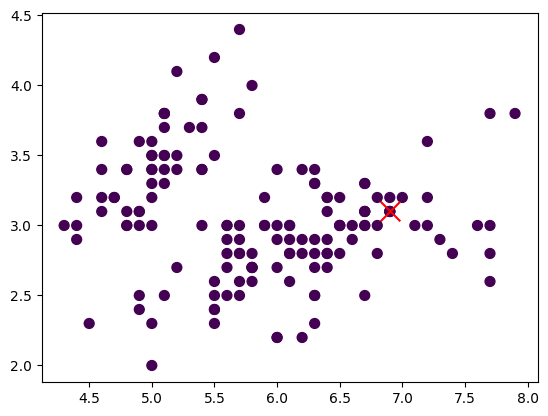

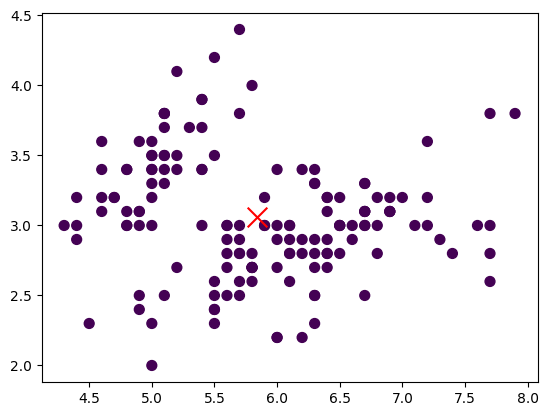

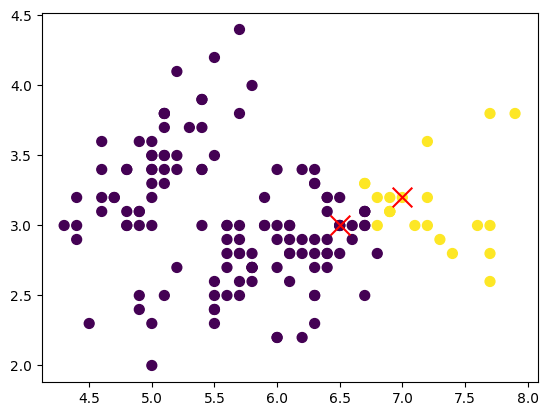

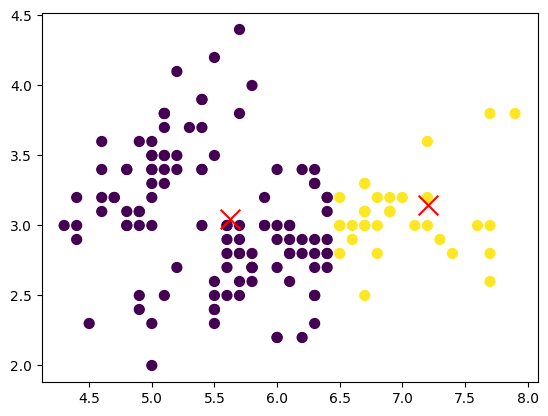

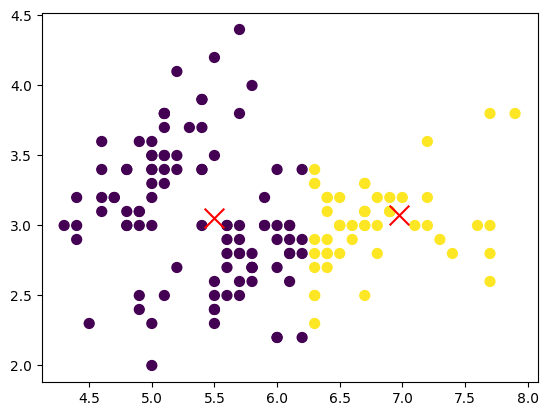

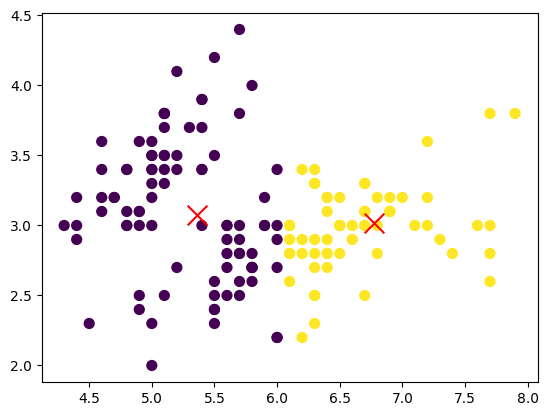

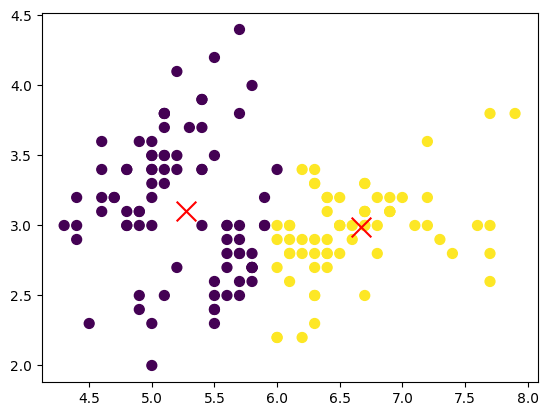

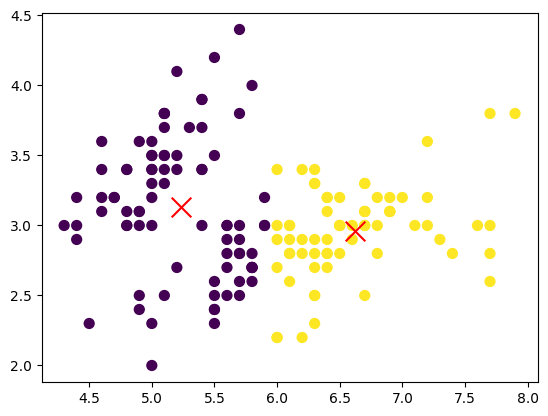

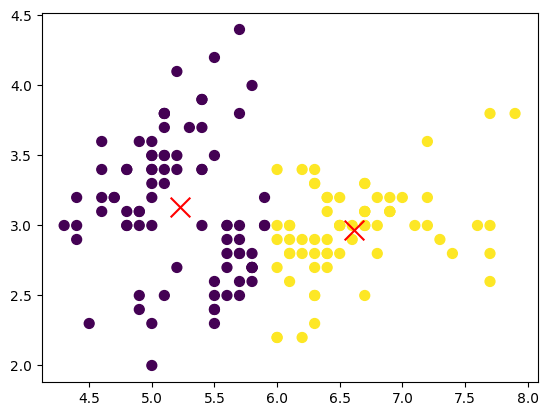

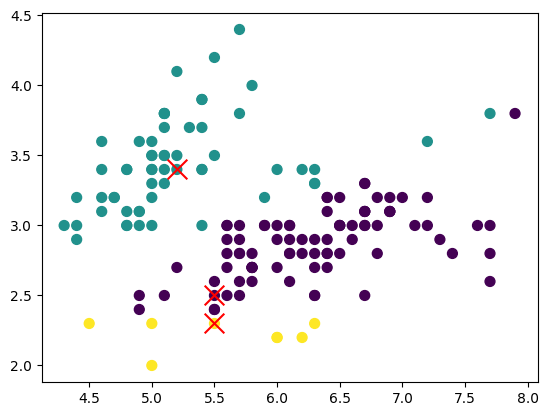

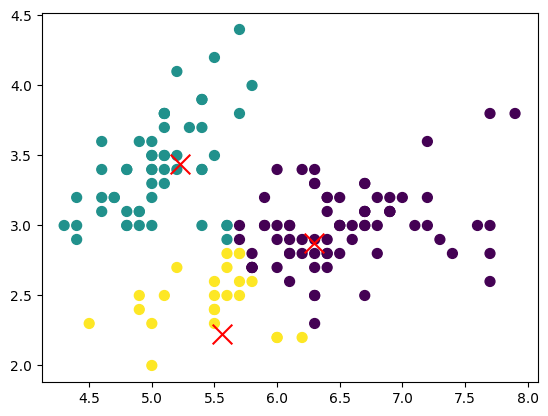

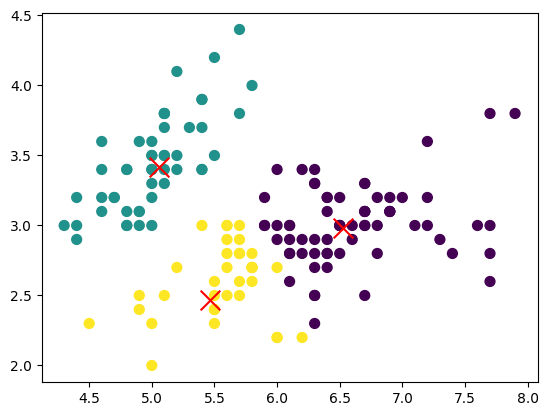

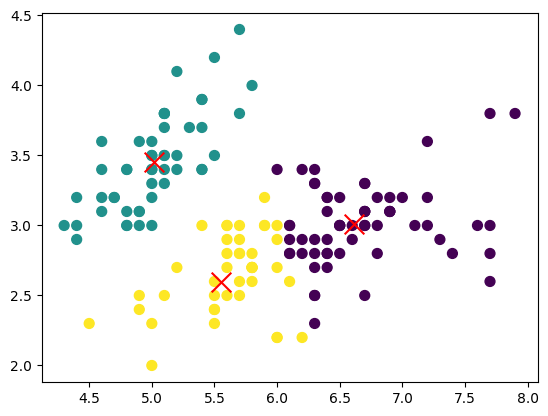

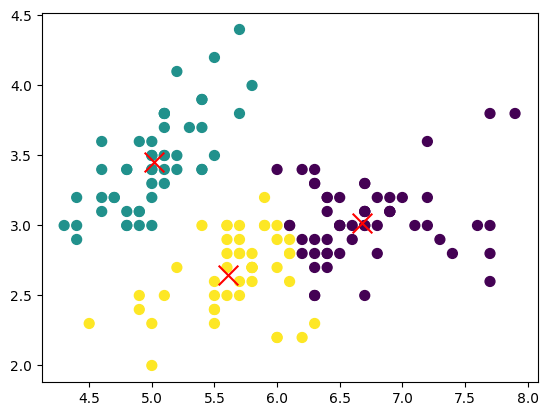

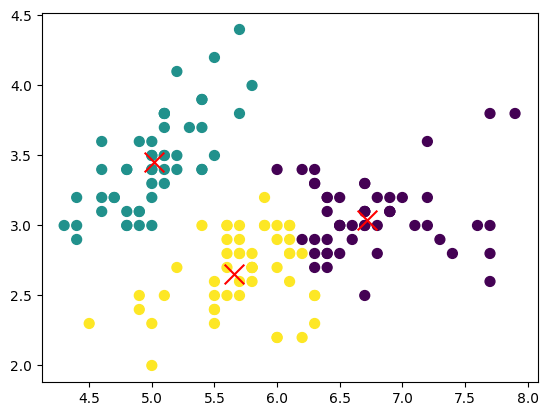

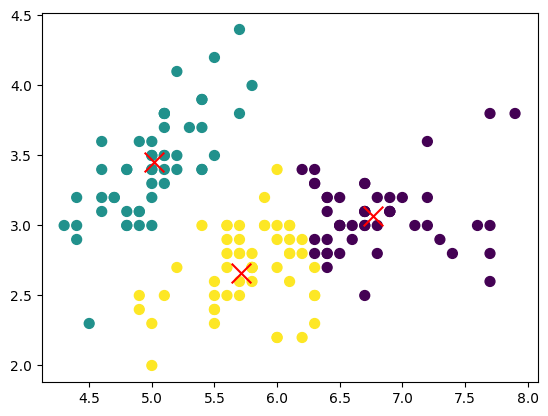

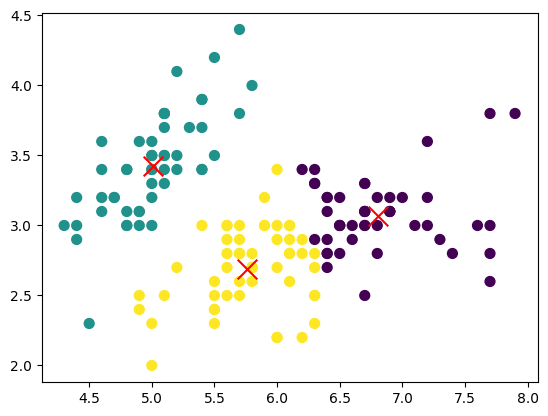

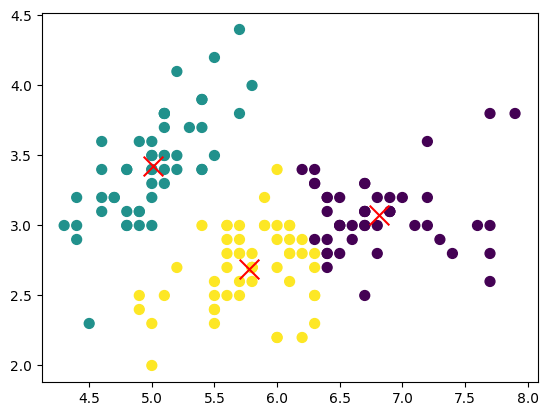

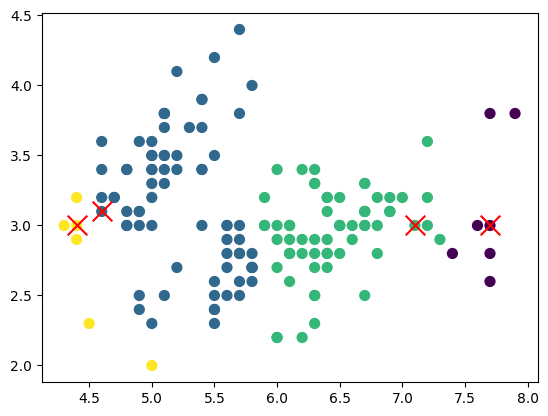

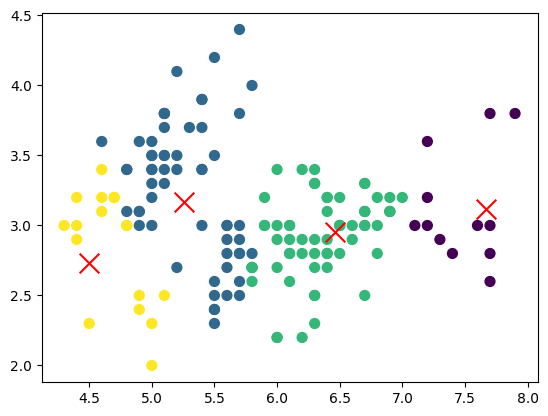

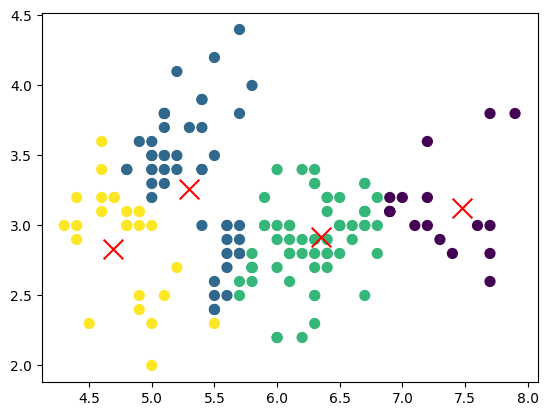

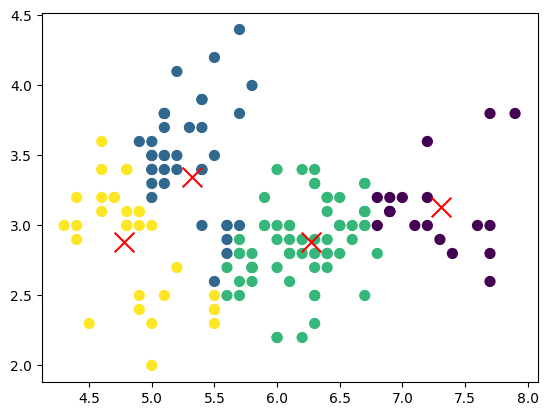

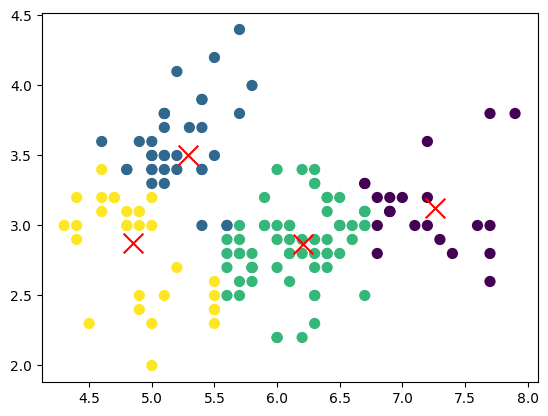

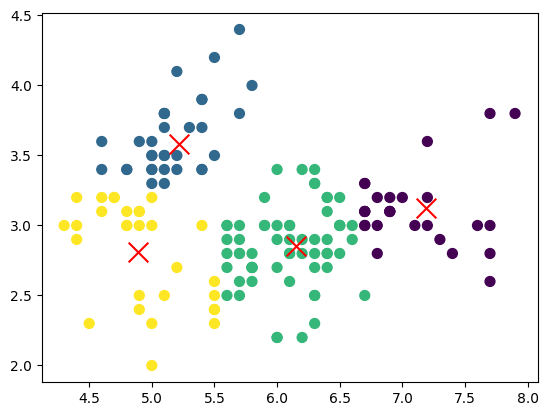

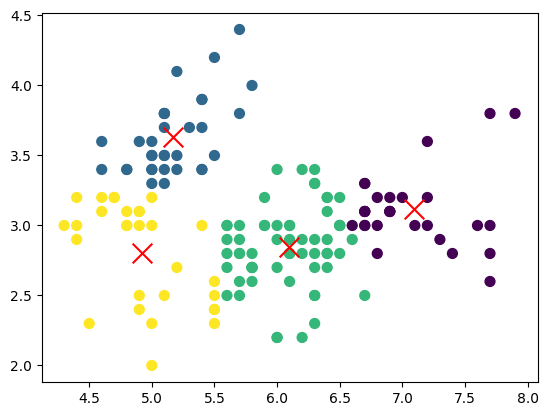

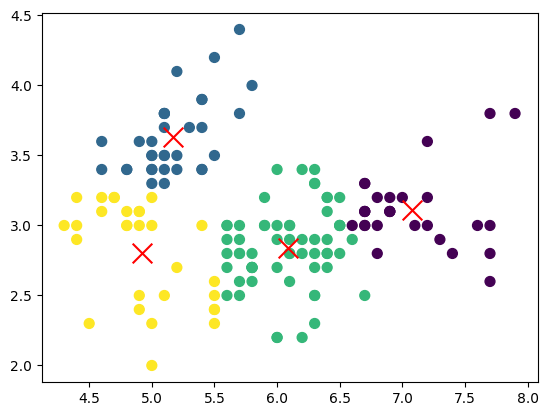

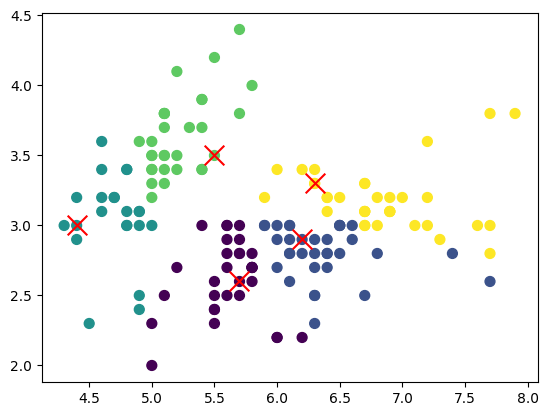

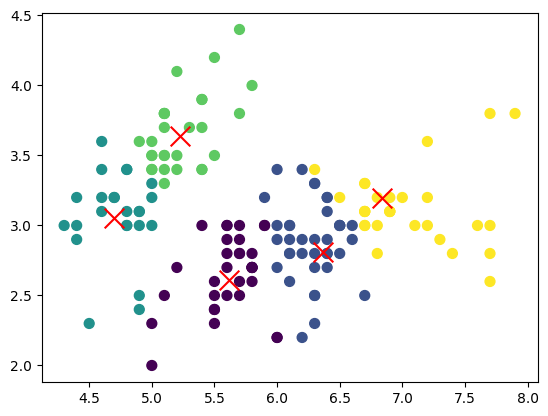

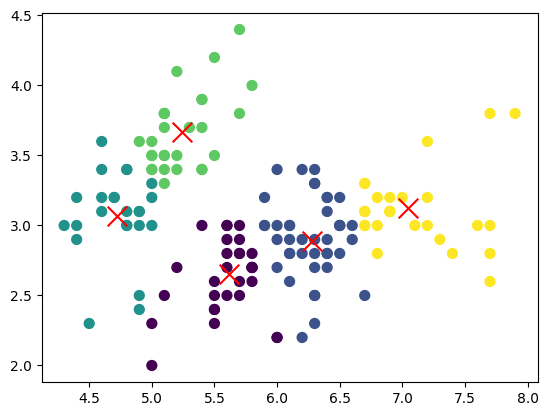

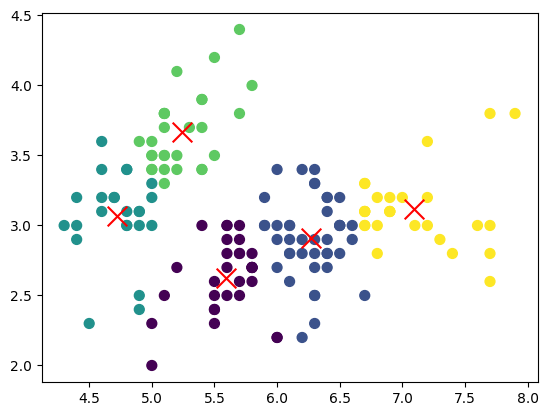

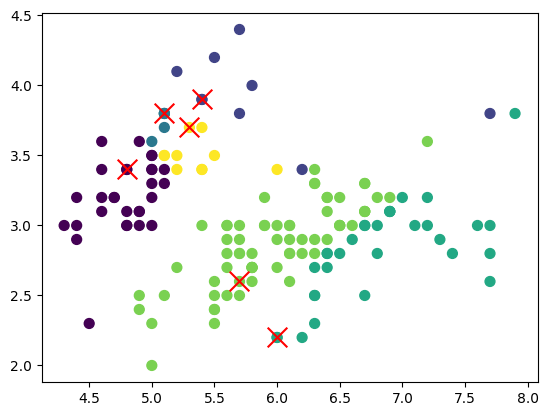

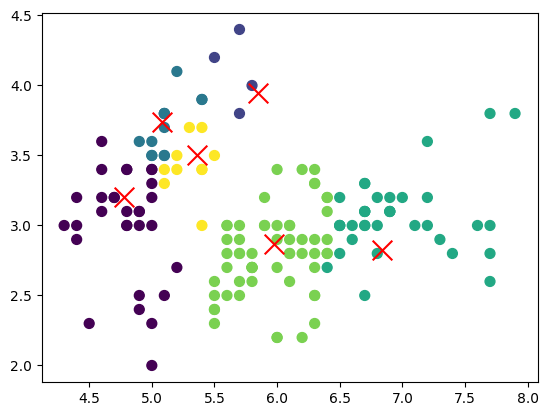

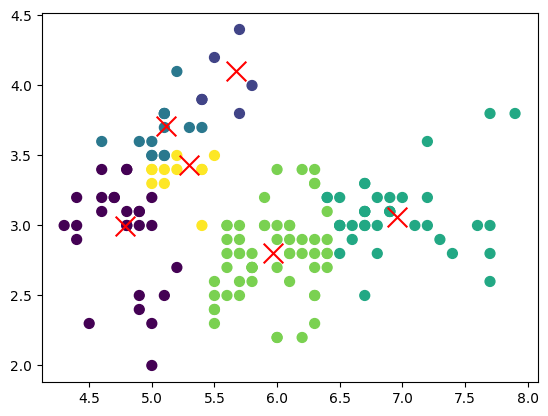

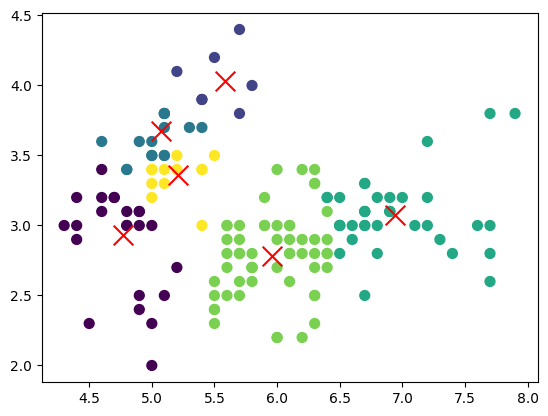

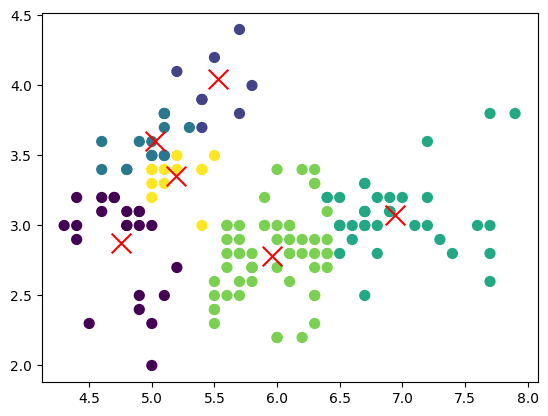

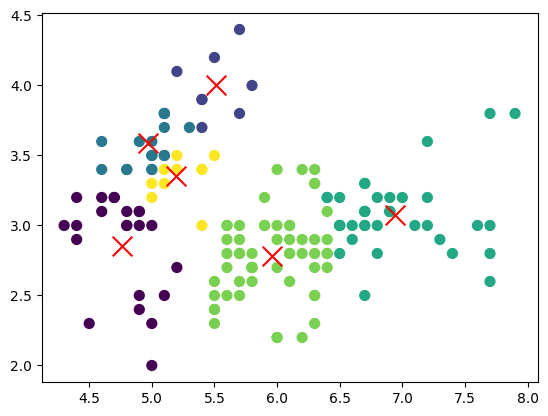

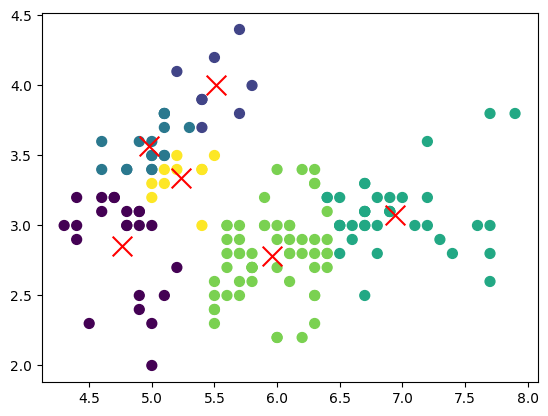

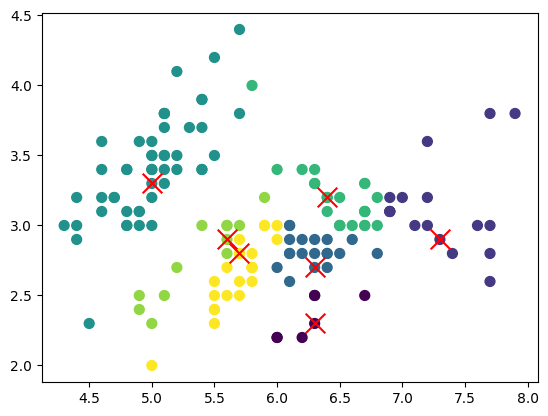

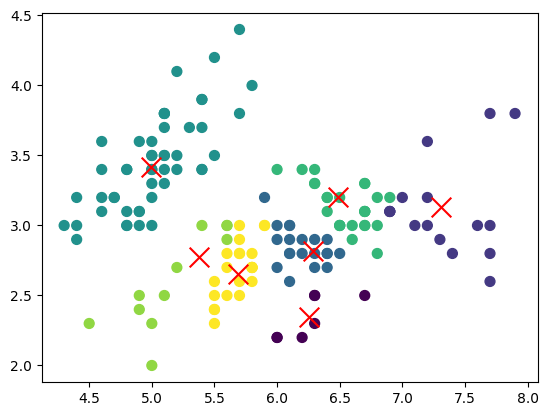

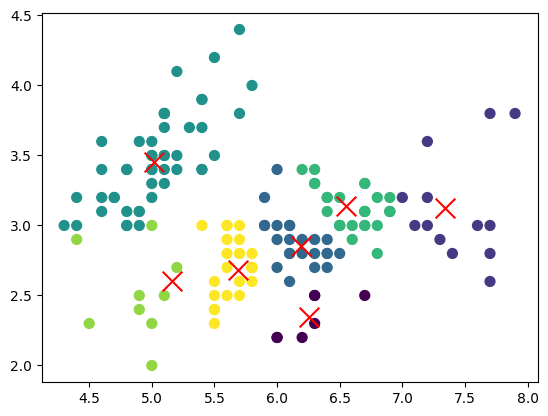

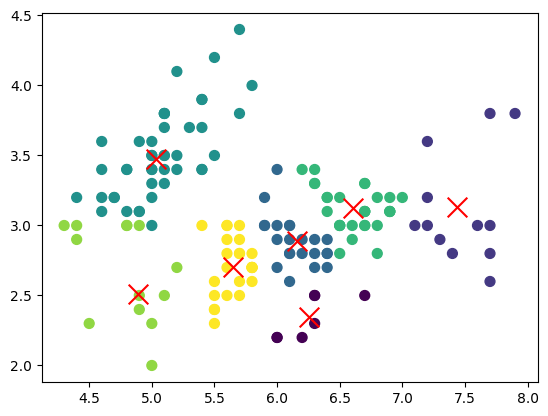

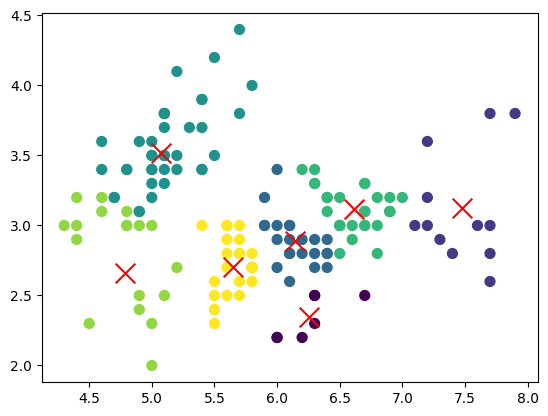

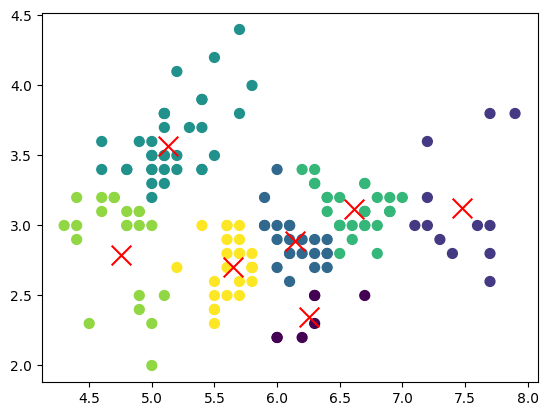

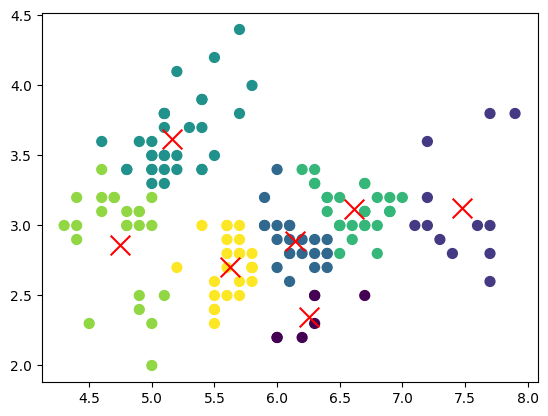

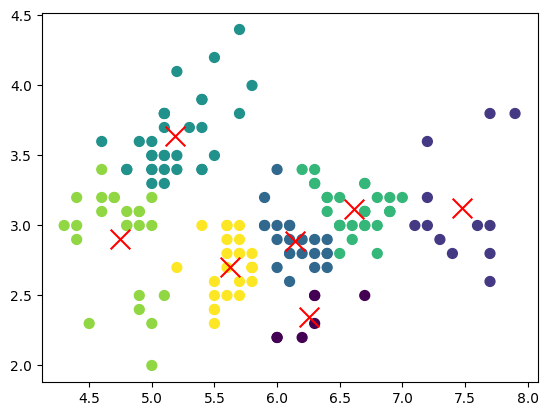

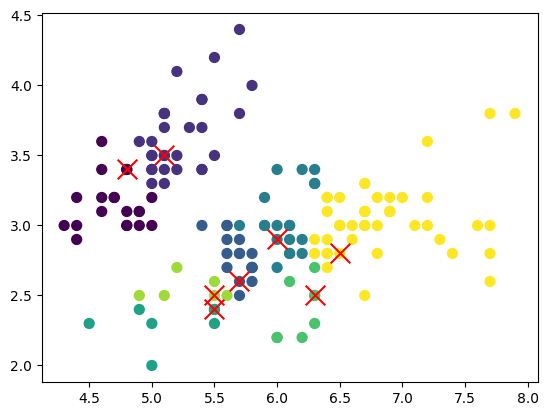

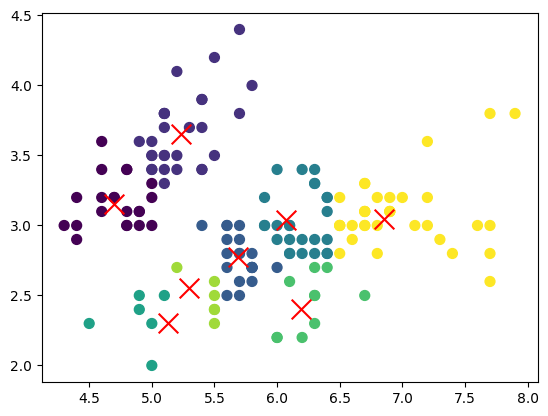

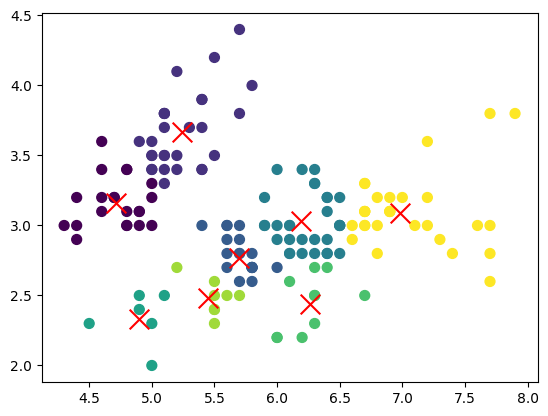

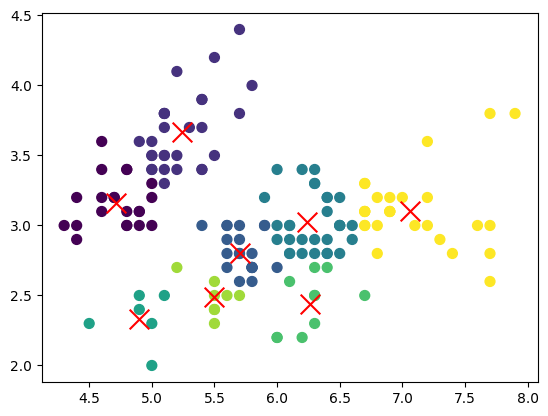

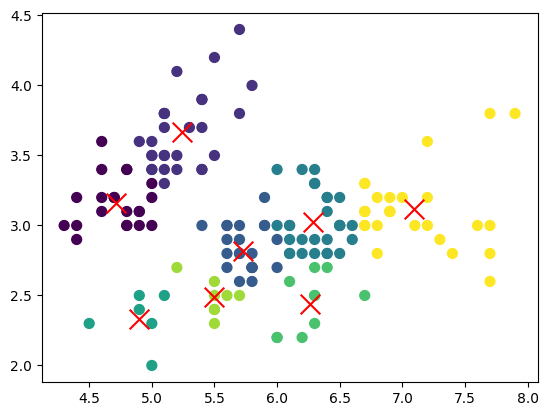

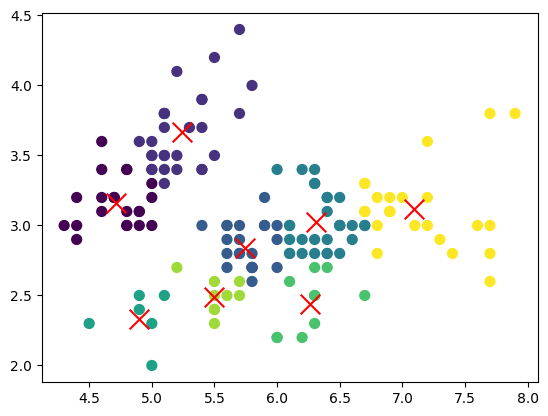

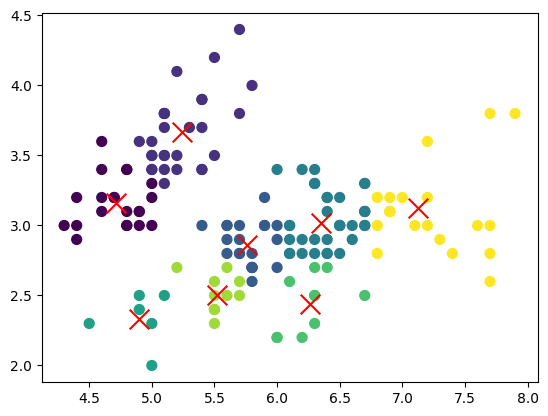

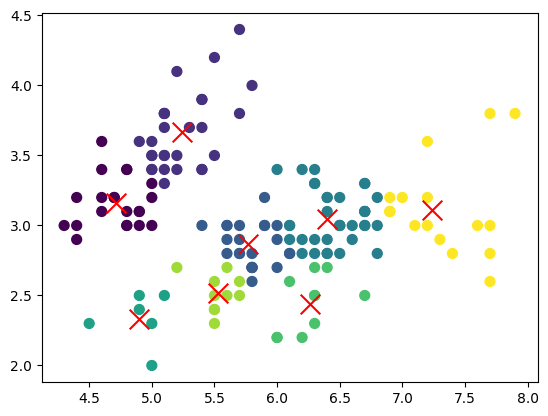

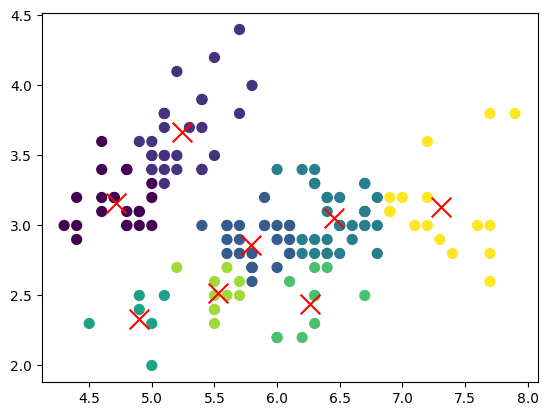

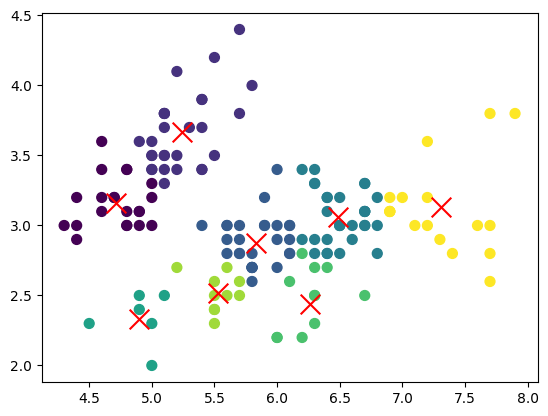

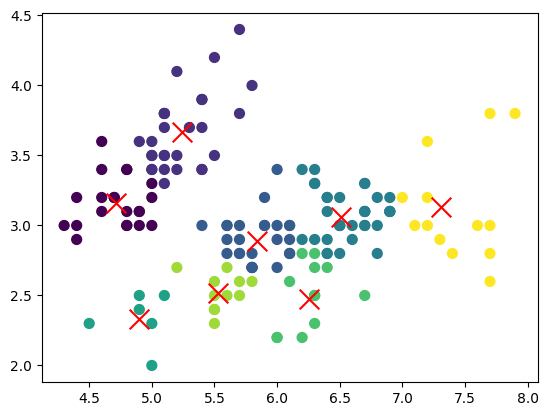

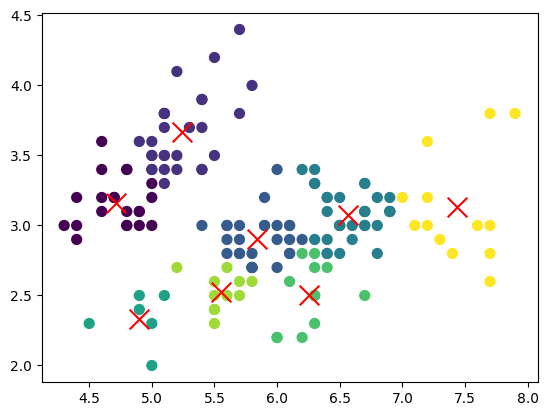

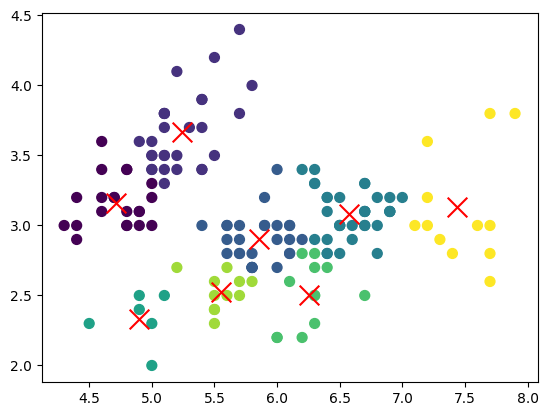

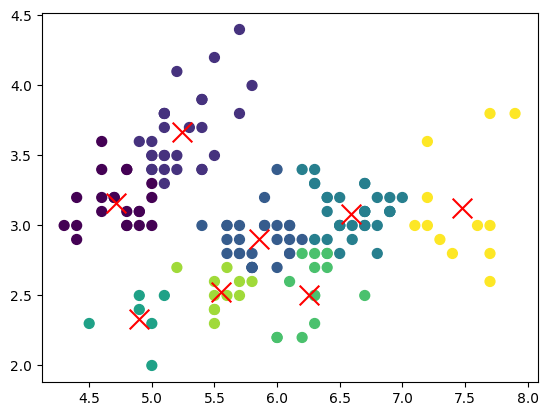

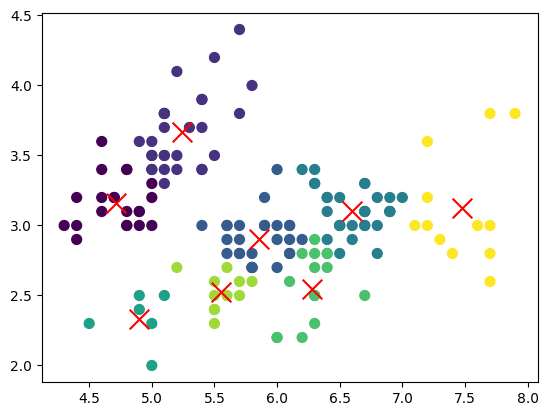

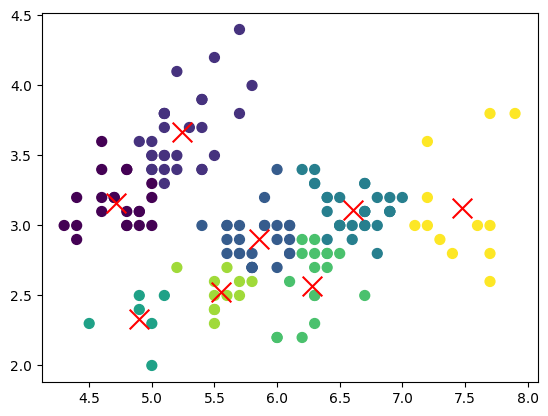

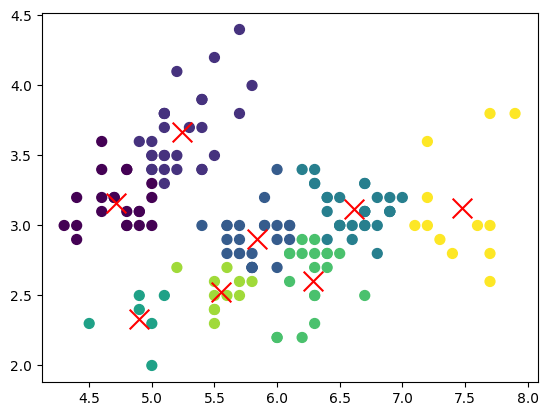

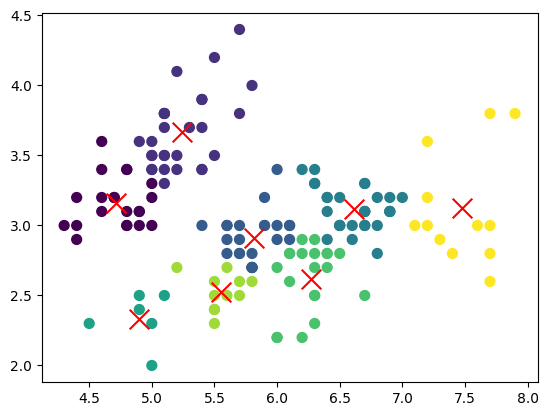

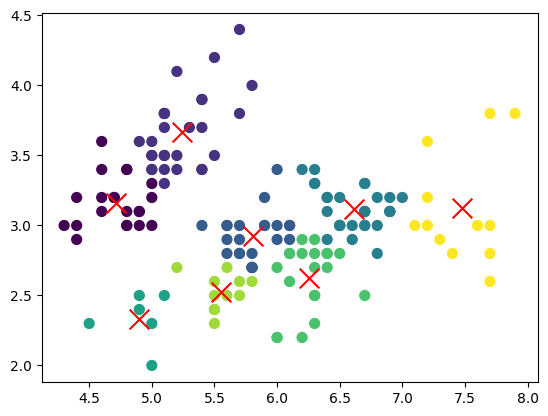

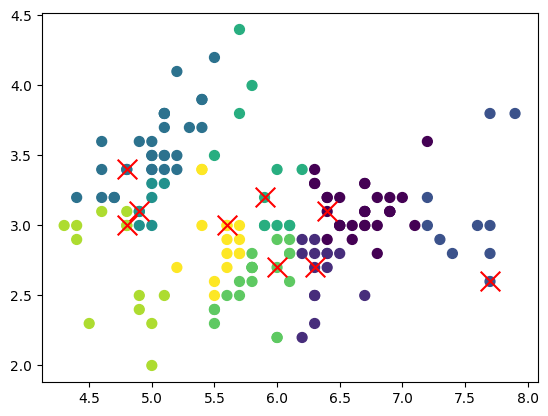

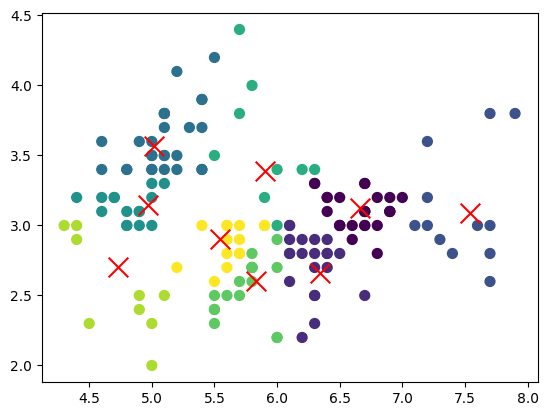

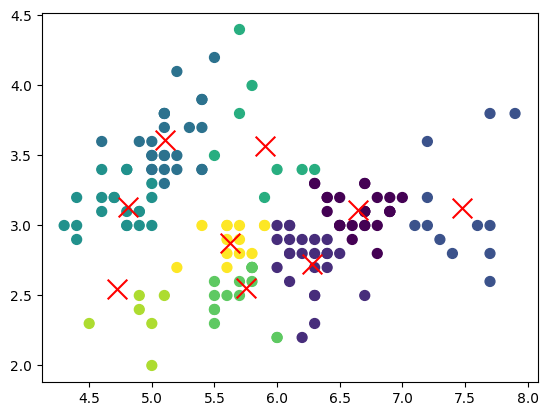

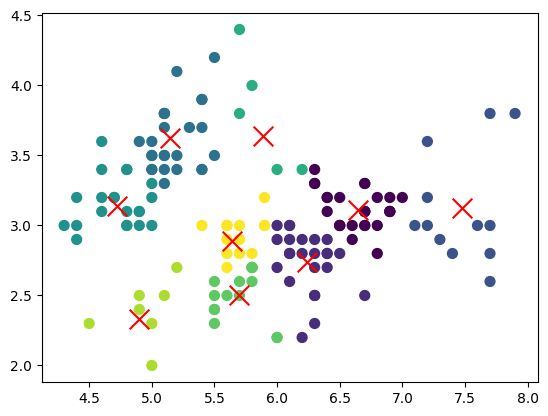

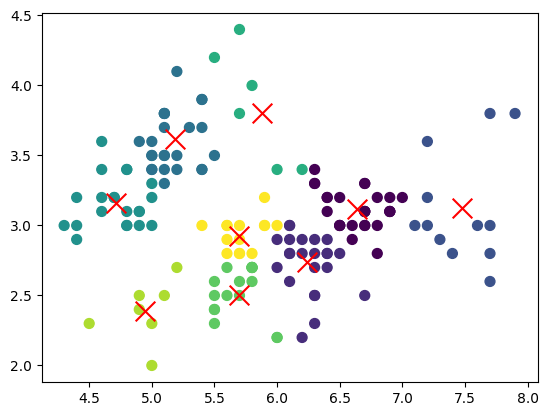

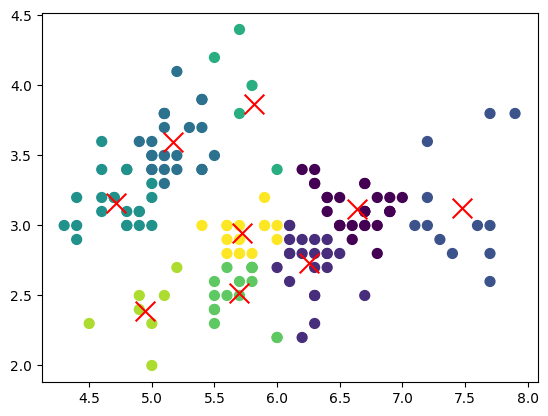

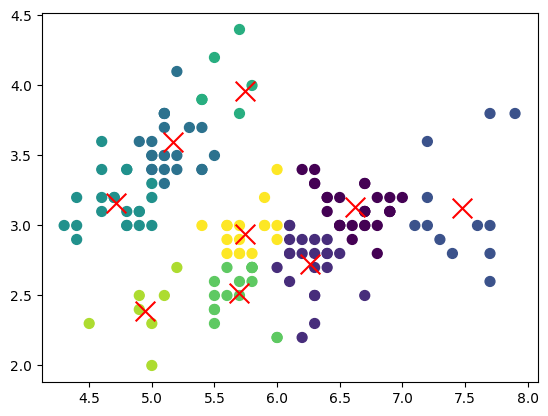

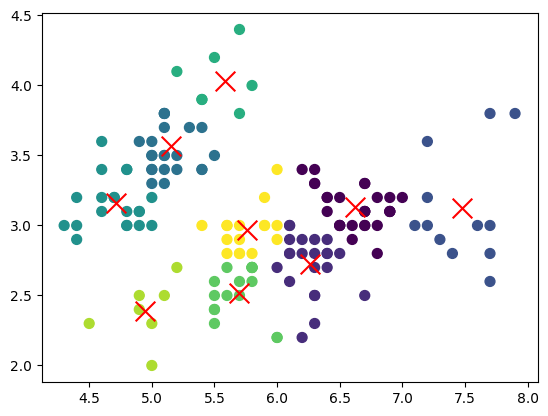

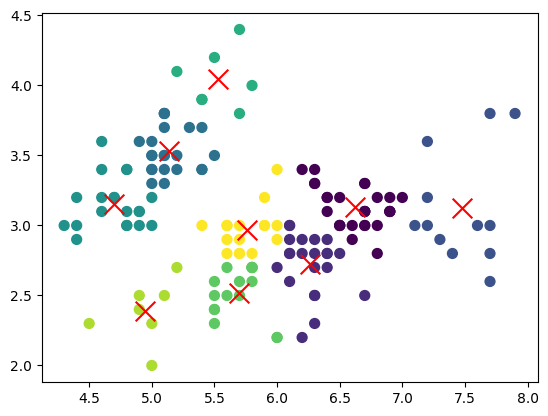

In [63]:
def wcss(X, labels, k, centroid):
    """compute within cluster sum of squares(compactness)"""
    intra_cluster_cohesion = 0
    for i in range(k):
        sub_x = (X[labels == i]  - centroid[i]) ** 2
        intra_cluster_cohesion += np.sum(sub_x)
    
    return intra_cluster_cohesion

k_labels = [1,2,3,4,5,6,7,8,9]
compactenness_list = []
for i in k_labels:
    centroid , labels = kmeans(X, i)
    cls_compactness = wcss(X, labels, i, centroid)
    compactenness_list.append(cls_compactness)


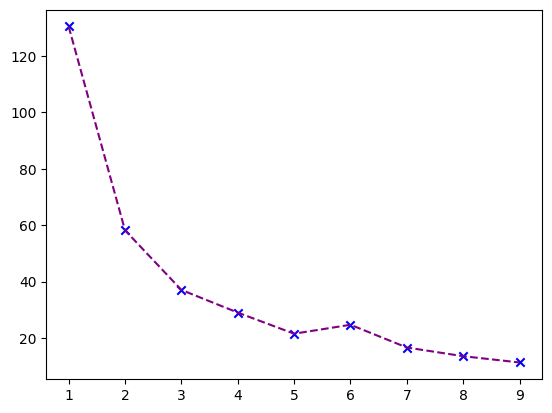

In [68]:
plt.scatter(k_labels,compactenness_list, c='blue', marker='x')
plt.plot(k_labels,compactenness_list, ls='--', color='purple')